In [1]:
!pip install -q kora

     |████████████████████████████████| 61kB 3.1MB/s 
     |████████████████████████████████| 61kB 4.3MB/s 


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kora.data_table

In [3]:
 from sklearn.impute import SimpleImputer
 from sklearn.preprocessing import normalize
 from sklearn.metrics import mean_squared_error

In [4]:
from kora import eda

NumExpr defaulting to 2 threads.


In [5]:
import time
import datetime

## **1 Data Preparation and Data Cleaning**

In [6]:
!gdown --id 1YFzvJNF0yF_Tr8ScuyaLCy1phUhgvVkr

Downloading...
From: https://drive.google.com/uc?id=1YFzvJNF0yF_Tr8ScuyaLCy1phUhgvVkr
To: /content/HW5_PRSA_Data_Tiantan.csv
2.66MB [00:00, 83.5MB/s]


In [51]:
data=pd.read_csv('/content/HW5_PRSA_Data_Tiantan.csv')
data.head()

No  year  month  day  hour  PM2.5  ...    PRES  DEWP  RAIN   wd  WSPM  station
0   1  2013      3    1     0    6.0  ...  1024.5 -21.4   0.0  NNW   5.7  Tiantan
1   2  2013      3    1     1    6.0  ...  1025.1 -22.1   0.0   NW   3.9  Tiantan
2   3  2013      3    1     2    6.0  ...  1025.3 -24.6   0.0  NNW   5.3  Tiantan
3   4  2013      3    1     3    6.0  ...  1026.2 -25.5   0.0    N   4.9  Tiantan
4   5  2013      3    1     4    5.0  ...  1027.1 -24.5   0.0  NNW   3.2  Tiantan

[5 rows x 18 columns]

DataPrep Report
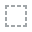
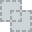
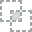
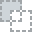
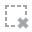
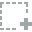
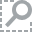
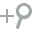
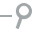
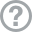
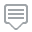
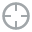
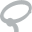
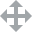
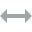
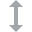
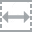
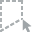
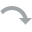
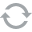
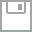
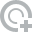
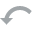
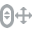
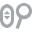
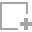
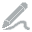
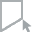
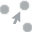
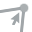
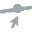

In [8]:
eda.create_report(data)

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34387 non-null  float64
 6   PM10     34467 non-null  float64
 7   SO2      33946 non-null  float64
 8   NO2      34320 non-null  float64
 9   CO       33938 non-null  float64
 10  O3       34221 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [53]:
data.head()

No  year  month  day  hour  PM2.5  ...    PRES  DEWP  RAIN   wd  WSPM  station
0   1  2013      3    1     0    6.0  ...  1024.5 -21.4   0.0  NNW   5.7  Tiantan
1   2  2013      3    1     1    6.0  ...  1025.1 -22.1   0.0   NW   3.9  Tiantan
2   3  2013      3    1     2    6.0  ...  1025.3 -24.6   0.0  NNW   5.3  Tiantan
3   4  2013      3    1     3    6.0  ...  1026.2 -25.5   0.0    N   4.9  Tiantan
4   5  2013      3    1     4    5.0  ...  1027.1 -24.5   0.0  NNW   3.2  Tiantan

[5 rows x 18 columns]

In [54]:
df=data[['year','month','day','hour','PRES']]

In [55]:
df['date']='unknown'
for i in range(len(df)):
  year =str(df.at[i,'year'])
  month=str(df.at[i,'month'])
  day  =str(df.at[i,'day'])
  df.at[i,'date']=f'{year}/{month}/{day} 00:00'
df['date']=pd.to_datetime(df['date'],format='%Y/%m/%d')
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


year  month  day  hour    PRES       date
0  2013      3    1     0  1024.5 2013-03-01
1  2013      3    1     1  1025.1 2013-03-01
2  2013      3    1     2  1025.3 2013-03-01
3  2013      3    1     3  1026.2 2013-03-01
4  2013      3    1     4  1027.1 2013-03-01

In [56]:
df=df.drop(['year','month','day','hour'],axis=1)
df.head()

PRES       date
0  1024.5 2013-03-01
1  1025.1 2013-03-01
2  1025.3 2013-03-01
3  1026.2 2013-03-01
4  1027.1 2013-03-01

In [57]:
df=df.groupby('date').mean()
df.head(10)

PRES
date                   
2013-03-01  1028.783333
2013-03-02  1028.850000
2013-03-03  1016.458333
2013-03-04  1019.454167
2013-03-05  1012.704167
2013-03-06  1009.295833
2013-03-07  1004.108333
2013-03-08  1001.329167
2013-03-09  1006.129167
2013-03-10  1022.504167

## **3 Visualize Data**

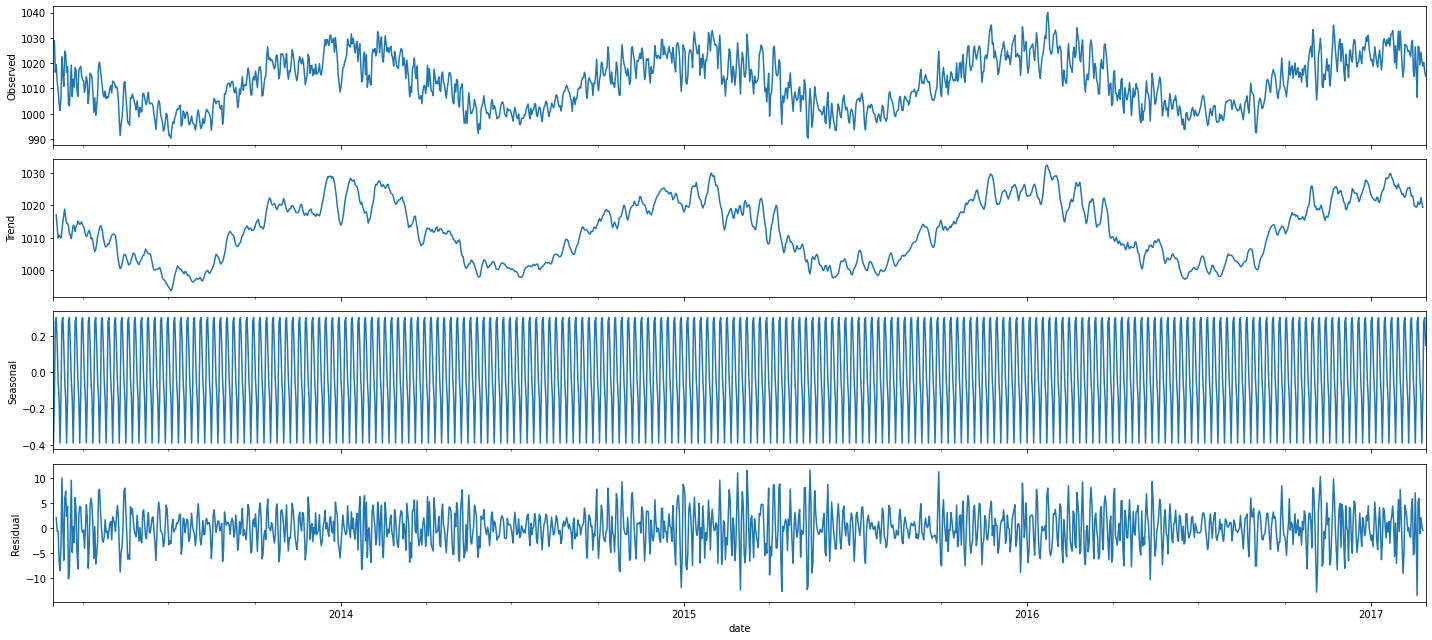

In [58]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 20, 9
decomposition = sm.tsa.seasonal_decompose(df['PRES'], model='Additive')
fig = decomposition.plot()
plt.show()

## **4 Calculate ACF and PACF**

In [59]:
from statsmodels.tsa.stattools import adfuller
from numpy import log

In [90]:
def stationarity_test(timeseries):
  print('Augment Dicky Fuller Test:')
  adftest = adfuller(timeseries, autolag='AIC')
  adfoutput = pd.Series(adftest[0:4], index=['Test Statistic','P-Value','#Lags','Number of Observations'])

  print('Test_Statistic :' + str(adfoutput[0]))
  print('p-values :' + str(adfoutput[1]))
  print('Number of observation :' + str(adfoutput[3]))

In [91]:
stationarity_test(df.PRES)

Augment Dicky Fuller Test:
Test_Statistic :-2.3559565556058506
p-values :0.15455499790354793
Number of observation :1447.0


since the p-value is >0.1, this data is not stationary. This data should not use ARIMA to predict. However, p-value is not too different from the suitable interval, so we could still use ARIMA to predict if you make it more stationary.

### Make the data more stationary

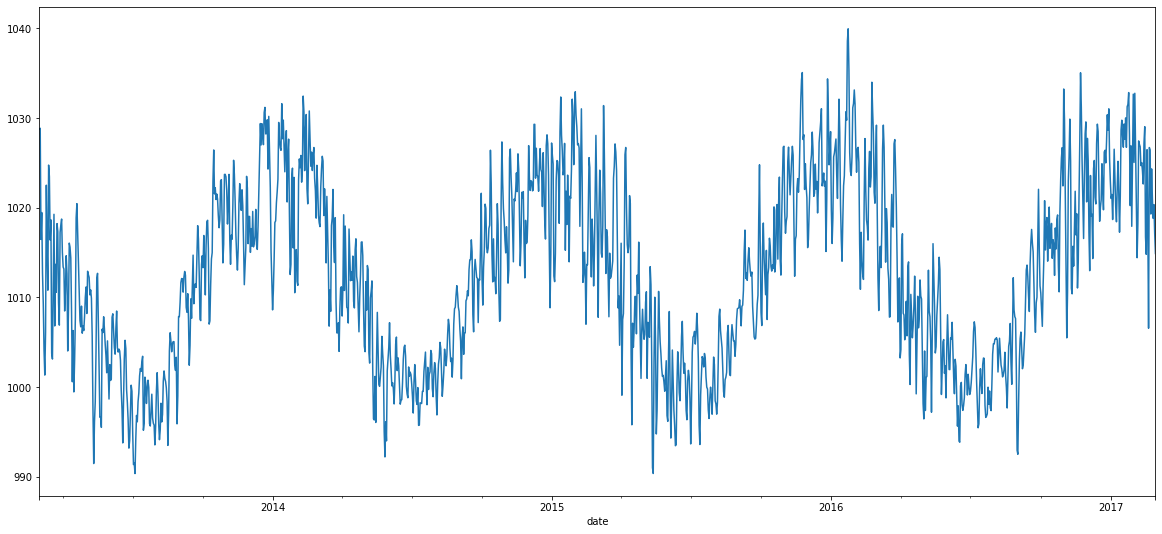

In [92]:
df['PRES'].plot()

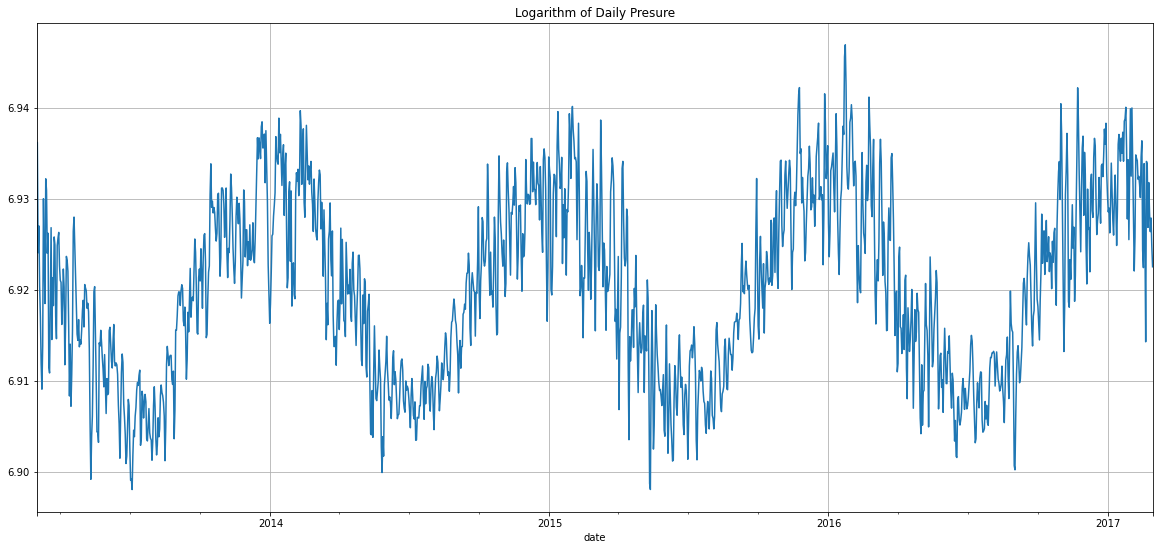

In [93]:
pres_log = np.log(df.PRES)

pres_log.plot()
plt.title('Logarithm of Daily Presure')
plt.grid(True)

In [94]:
stationarity_test(pres_log)

Augment Dicky Fuller Test:
Test_Statistic :-2.3498143711073576
p-values :0.15640452958019346
Number of observation :1447.0


no significant difference from before

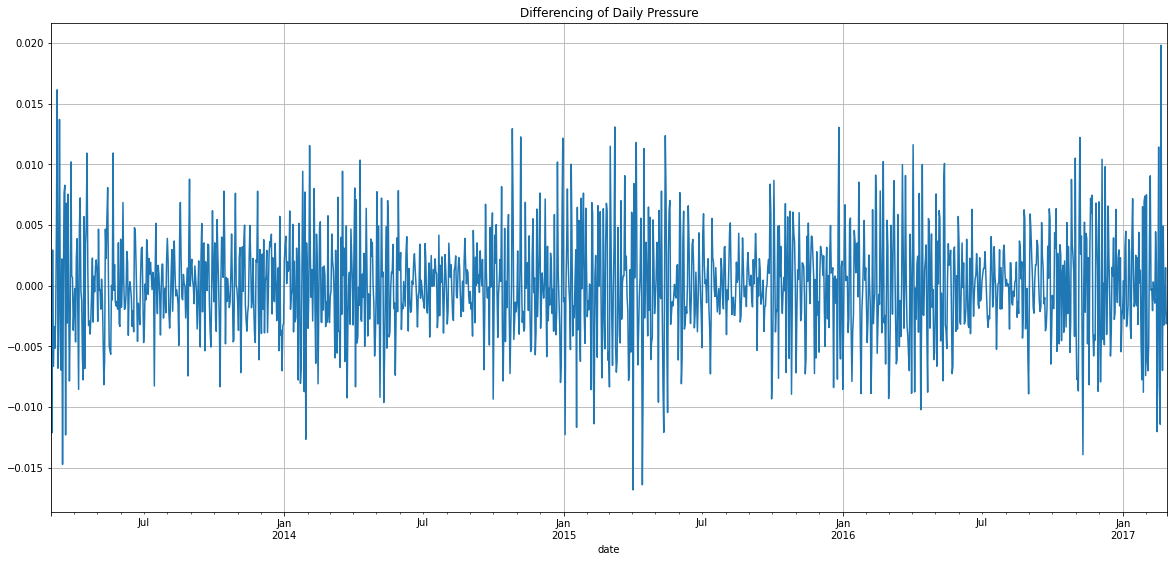

In [95]:
pres_log_diff = pres_log - pres_log.shift()
pres_log_diff.dropna(inplace = True)

pres_log_diff.plot()
plt.title('Differencing of Daily Pressure')
plt.grid(True)

In [96]:
stationarity_test(pres_log_diff)

Augment Dicky Fuller Test:
Test_Statistic :-16.961372151671085
p-values :9.303007534110315e-30
Number of observation :1447.0


now, the data is stationary so we can continue to create ARIMA model

In [97]:
from statsmodels.tsa.stattools import acf
acf_df=acf(pres_log_diff,fft = True)
acf_df

array([ 1.00000000e+00,  1.56761530e-02, -2.92464011e-01, -1.39045105e-01,
       -7.19902575e-02, -1.04935315e-02,  6.88967599e-02, -3.96970511e-02,
       -1.67583191e-02,  7.49564238e-03, -1.99938228e-02, -2.12429688e-02,
        3.26238105e-02, -2.24141646e-02,  2.75982348e-02,  4.84993328e-02,
       -4.03043274e-03, -1.99743044e-02, -2.55068359e-02,  2.09851232e-02,
       -3.68105037e-04, -4.69711014e-02, -2.19680638e-02,  3.13173772e-02,
        2.69845357e-02,  2.34530472e-02, -5.76742866e-03, -4.11497217e-04,
        1.64642397e-02,  8.71569474e-03, -2.64368818e-02, -1.37130898e-02,
       -9.07765124e-03,  1.88617380e-02,  3.99577536e-02, -1.64945398e-02,
       -7.68267882e-03,  6.59981658e-03,  1.32852004e-02, -9.05203942e-03,
       -4.03631038e-03])

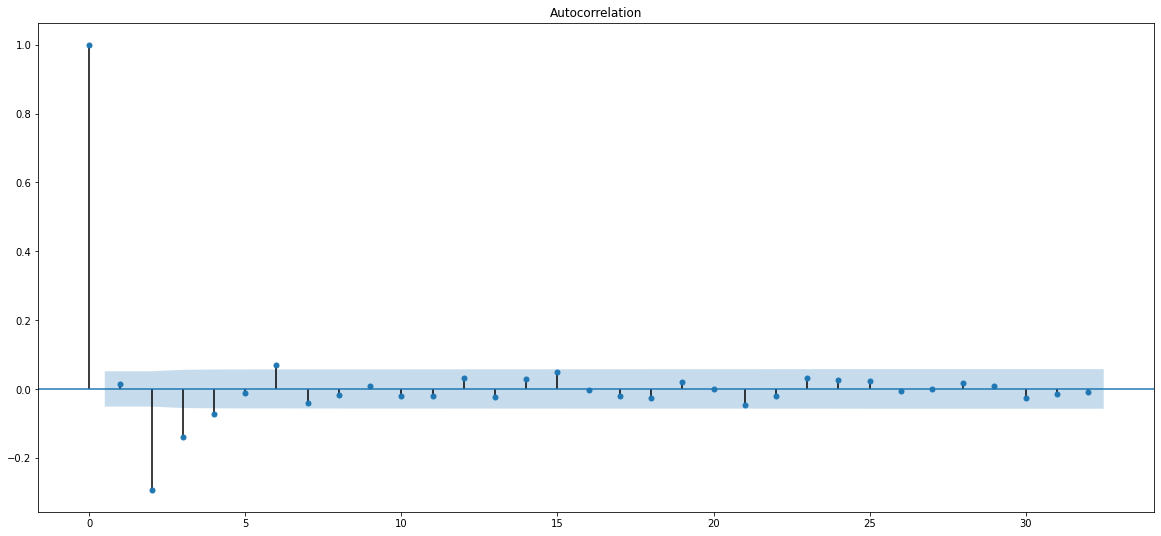

In [98]:

from statsmodels.graphics.tsaplots import plot_acf
plot_acf(pres_log_diff,fft = True)
plt.show()


In [99]:
from statsmodels.tsa.stattools import pacf
pacf_df=pacf(pres_log_diff, method='ols')
pacf_df

array([ 1.00000000e+00,  1.56790018e-02, -2.92937338e-01, -1.40346466e-01,
       -1.77279007e-01, -1.17878656e-01, -4.37475501e-02, -1.38471036e-01,
       -6.06493578e-02, -6.95176526e-02, -8.47062114e-02, -8.67530159e-02,
       -3.51979089e-02, -9.42873932e-02, -1.69714154e-02, -2.95260442e-03,
       -2.25033005e-02, -1.44073836e-02, -3.64139938e-02,  2.50630039e-02,
       -2.96818438e-02, -5.70222019e-02, -4.34116528e-02, -1.15690141e-02,
       -1.51620715e-02,  5.41874673e-03, -6.76573609e-03,  1.70301692e-02,
        3.12940301e-02,  2.58754091e-02,  3.67764670e-03,  7.56970332e-03,
       -8.64010966e-04,  2.90804296e-02,  5.06207978e-02,  8.33554462e-03,
        4.95789571e-02,  3.68799804e-02,  5.60576173e-02,  2.45904013e-02,
        3.81193692e-02])

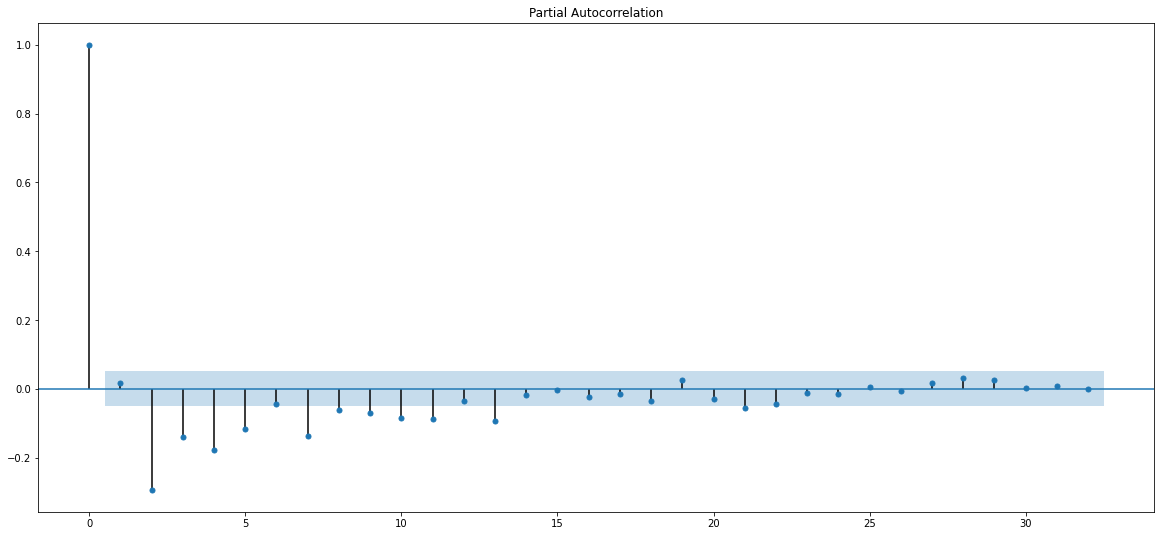

In [100]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(pres_log_diff,method='ols')
plt.show()

In [101]:
cut_point = 1.96/np.sqrt(len(pres_log_diff))

p = 0;
idxP = 0;
for j in range(0, len(pacf_df)):
  if pacf_df[j] < cut_point:
    p = pacf_df[j]
    idxP = j
    break
print('p = ', idxP)


q = 0;
idxQ = 0;
for i in range(0, len(acf_df)):
  if acf_df[i] < cut_point:
    q = acf_df[i]
    idxQ = i
    break
print('q = ', idxQ)

p =  1
q =  1


## **5 Apply ARIMA**

In [102]:
from statsmodels.tsa.arima_model import ARIMA

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  # - Attemtping to index with a type that cannot be cast to integer
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  # - Attemtping to index with a type that cannot be cast to integer


Text(0.5, 1.0, 'RSS: 0.023743')

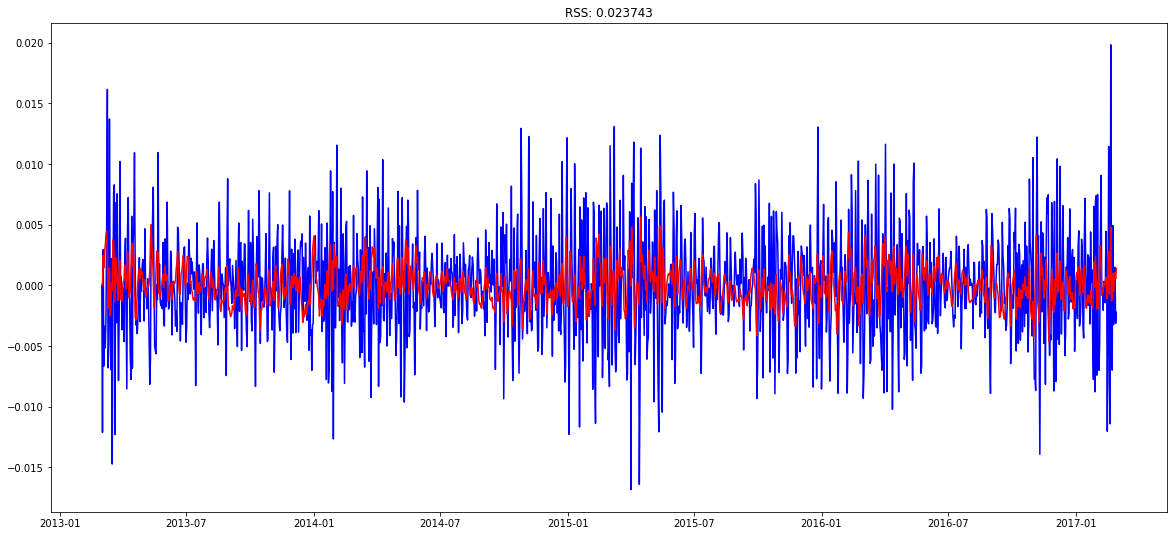

In [103]:
model_1 = ARIMA(pres_log, order=(idxP, 1, idxQ))

results_ARIMA = model_1.fit(disp=-1)

plt.plot(pres_log_diff, color = 'blue', label = 'actual data')

plt.plot(results_ARIMA.fittedvalues, color='red', label = 'predicted data')


plt.title('RSS: %f'% np.sum((results_ARIMA.fittedvalues-pres_log_diff)**2))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  # - Attemtping to index with a type that cannot be cast to integer
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  # - Attemtping to index with a type that cannot be cast to integer


Text(0.5, 1.0, 'RSS: 0.026915')

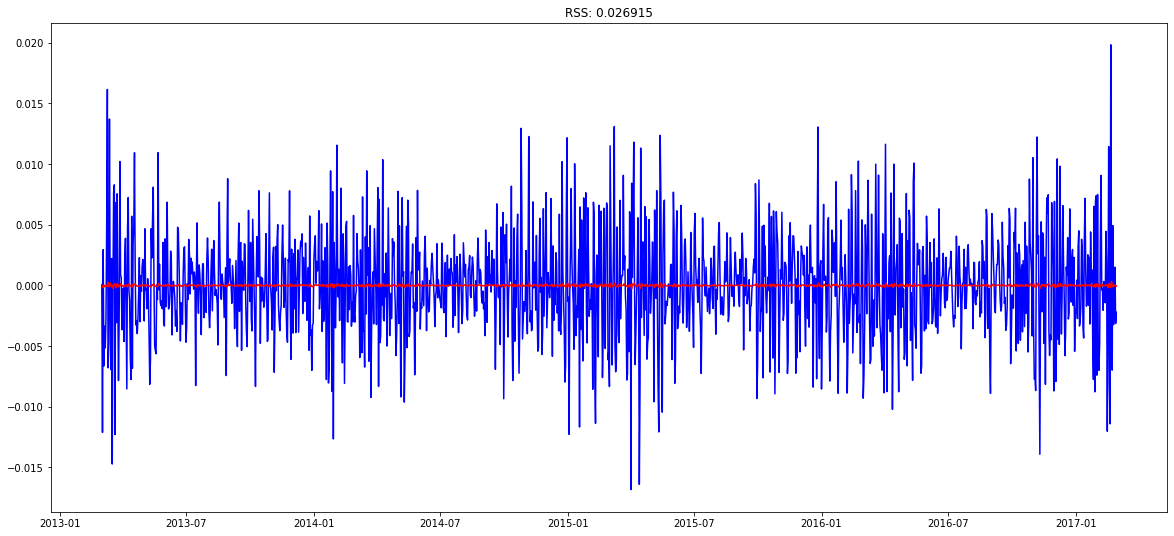

In [77]:
model_2 = ARIMA(pres_log, order=(idxP, 1, 0))

results_ARIMA_2 = model_2.fit(disp=-1)

plt.plot(pres_log_diff, color = 'blue', label = 'actual data')

plt.plot(results_ARIMA_2.fittedvalues, color='red', label = 'predicted data')


plt.title('RSS: %f'% np.sum((results_ARIMA_2.fittedvalues-pres_log_diff)**2))

from RSS score, model_1 is better than model_2 with q=0

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  # - Attemtping to index with a type that cannot be cast to integer
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  # - Attemtping to index with a type that cannot be cast to integer
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  return -self.score(params, *args) / nobs


Text(0.5, 1.0, 'RSS: 0.026906')

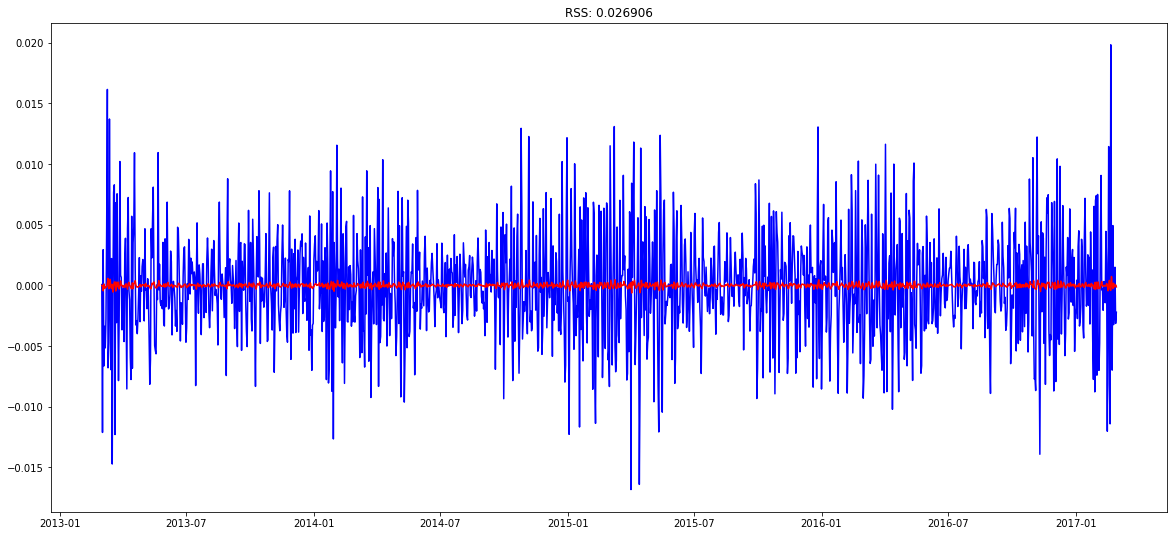

In [78]:
model_3 = ARIMA(pres_log, order=(0, 1, idxQ))

results_ARIMA_3 = model_3.fit(disp=-1)

plt.plot(pres_log_diff, color = 'blue', label = 'actual data')

plt.plot(results_ARIMA_3.fittedvalues, color='red', label = 'predicted data')


plt.title('RSS: %f'% np.sum((results_ARIMA_3.fittedvalues-pres_log_diff)**2))

model_1 is still the best from RSS score

### Change data back to the actual scale

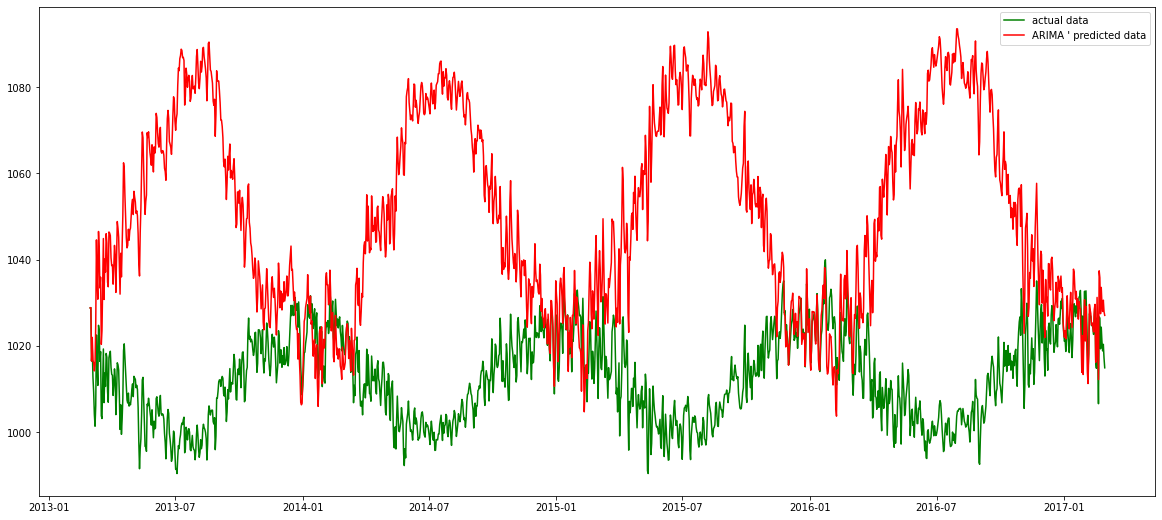

In [105]:
prediction_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
prediction_ARIMA_diff_cumsum = prediction_ARIMA_diff.cumsum()
prediction_ARIMA_log = pd.Series(pres_log)
prediction_ARIMA_log = prediction_ARIMA_log.add(prediction_ARIMA_diff_cumsum,fill_value=0)
prediction_ARIMA = np.exp(prediction_ARIMA_log)


plt.plot(df.PRES, color = 'green', label = 'actual data')

plt.plot(prediction_ARIMA, color = 'red', label = 'ARIMA \' predicted data')

plt.legend(loc = 'best')